## 冯汇然, 12231095, Assignment 05, Due: 12/20 19：00

## 批改人：吴昊天

## 得分：40/40

# 1. Modeling of carbon cycle
In this problem, we will build a box model to understand the Earth’s carbon cycle based on the framework in [Tomizuka 2009](https://mathcs.holycross.edu/~little/Montserrat1112/envmodbackup/1%252E3013196-1.pdf).

**1.1 [15 points]** Following equation 1-2 (without the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm (parts per million) from 1987 to 2004.

**1.2 [20 points]** Following equation 3-4 (with the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm from 1987 to 2004.

**1.3 [5 points]** Based on your results from 1.1 and 1.2, reproduce Figure 2 in Tomizuka (2009) as much as you can.

**[Bonus] [15 points]** Following equation 5-13, compute the atmospheric CO2 level in ppm and reproduce Figure 4 in Tomizuka (2009).

Useful data sets:

- [Global Fossil-Fuel CO2 Emissions](https://data.ess-dive.lbl.gov/portals/CDIAC/FossilFuel-Emissions)
- [Mauna Loa CO2 annual mean data](https://gml.noaa.gov/ccgg/trends/data.html)
- [Historical CO2 Records from the Law Dome DE08, DE08-2, and DSS Ice Cores](https://www.osti.gov/dataexplorer/biblio/dataset/1394156)

Source: Tomizuka (2009), Is a box model effective for understanding the carbon cycle?, *American Journal of Physics, 77, 156, doi: 10.1119/1.3013196*.

# ANS. 1.1

- Figure 1 shows a simple two-box model, which is modified from the multiple carbon cycle model.
- The content of 740 PgC (1 PgC= 1015 g of carbon) in the atmosphere corresponds to 347 ppm (parts per million） in 1986. The value of CO2 concentration in ppm is found by dividing the carbon content in PgC by 2.13.
- 方程1：dN1/dt = -k12×N1 + k21×N2 + gamma，方程2：dN2/dt = k12×N1 - k21×N2.
- 其中gamma为化石燃料燃烧产生的二氧化碳的速率，N1和N2分别表示大气和海洋表面的碳浓度，t是时间，转移系数kij是从储库i到j的碳通量除以储库i中的碳含量之比：k12= 105/740 和 k21= 102/900.

![fig1.png](https://d3i71xaburhd42.cloudfront.net/ea7861b80bafb26284dcc0663f2d328c68b42f3d/3-Figure1-1.png)

Data Source:
- Total Global Carbon Emissions (1751-2014) file: [CSV-FILES.tar.gz](https://data.ess-dive.lbl.gov/catalog/d1/mn/v2/object/ess-dive-c534ae0d6913048-20180621T214704382) in [ESS-DIVE Data Archive](https://data.ess-dive.lbl.gov/view/doi:10.3334/CDIAC/00001_V2017).And I used `global.1751_2014.csv` in this tar.gz.

- Mauna Loa CO2 annual mean data ([CSV](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv)): `co2_annmean_mlo.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

I deleted the 2nd line and save as global.1751_2014_revised_by_hrfeng.csv (the deleted content: `Source: Tom Boden (Oak Ridge National Laboratory) Gregg Marland (Appalachian State University) and Bob Andres (Oak Ridge National Laboratory)`)

In [2]:
emis_df = pd.read_csv('global.1986_2014_revised_by_hrfeng.csv').iloc[:-10]


emis_df['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] = pd.to_numeric(emis_df['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'])
emis_df['Carbon emissions from cement production'] = pd.to_numeric(emis_df['Carbon emissions from cement production'])

# million metric tons of C = 1e6 * 1e6 g of C = 1e-3 PgC
emis_df['Production_of_CO2_by_fossil-fuel_burning(ppm)'] = (1e-3/2.13) * (emis_df['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - emis_df['Carbon emissions from cement production'])

emis_df

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only),Production_of_CO2_by_fossil-fuel_burning(ppm)
0,1986,5583,830,2293,2277,137,46,1.13,2.556808
1,1987,5725,892,2306,2339,143,44,1.14,2.620657
2,1988,5936,935,2412,2387,152,50,1.16,2.715493
3,1989,6066,982,2459,2428,156,41,1.16,2.774648
4,1990,6074,1026,2492,2359,157,40,1.14,2.777934
5,1991,6142,1051,2601,2284,161,45,1.14,2.807981
6,1992,6078,1085,2499,2290,167,36,1.11,2.775117
7,1993,6070,1117,2515,2225,176,37,1.09,2.767136
8,1994,6174,1133,2539,2278,186,39,1.09,2.811268
9,1995,6305,1151,2560,2359,197,39,1.10,2.867606


In [3]:
# Gamma does not change much, so parameterizing it by its mean value.
gamma = np.mean(emis_df['Production_of_CO2_by_fossil-fuel_burning(ppm)'])
gamma

2.922510501606128

The idea of solving the N1-N2 system of ordinary differential equations comes from Fangxiu Meng.

In [4]:
# Constants both in ODE 1.1 and ODE 1.2
k12 = 105 / 740
k21 = 102 / 900

In [5]:
# Defining a system of ordinary differential equations (ODE 1.1)
def model(y, t, k12, k21, gamma):

    N1, N2 = y
    dN1dt = -k12 * N1 + k21 * N2 + gamma
    dN2dt = k12 * N1 - k21 * N2
    
    return [dN1dt, dN2dt]

# Initial
N1_0 = 740/2.13 # Atmos CO2 (ppm)
N2_0 = 900/2.13 # Ocean CO2 (ppm)
y0 = [N1_0, N2_0]

# Year range: 1987-2014
t = np.arange(1, 20, 1)

# Solving ODE 1.1
solution = odeint(model, y0, t, args=(k12, k21, gamma))
N1_solution_Q1, N2_solution_Q1 = solution[:, 0], solution[:, 1]

print('Solotion of CO2 in atmosphere from 1987-2004 is: \n', N1_solution_Q1)
print('\nSolotion of CO2 in ocean from 1987-2004 is: \n', N2_solution_Q1)

Solotion of CO2 in atmosphere from 1987-2004 is: 
 [347.41784038 348.90649844 350.35215495 351.76449701 353.15102382
 354.51755476 355.86858413 357.20761175 358.53734637 359.85987273
 361.17681921 362.48944    363.79871075 365.10538547 366.4100493
 367.7131554  369.01505439 370.31601817 371.61625744]

Solotion of CO2 in ocean from 1987-2004 is: 
 [422.53521127 423.96906371 425.44591769 426.95608614 428.49206982
 430.04804939 431.61953053 433.2030134  434.79578928 436.39577342
 438.00133745 439.61122716 441.22446691 442.84030269 444.45814937
 446.07755376 447.69816528 449.319712   450.94198323]


# ANS. 1.2

In [6]:
# Read Mauna Loa CO2 annual mean data as observation data
obs_df = pd.read_csv('co2_annmean_mlo.csv',skiprows=43).iloc[27:46]
obs_df

,year,mean,unc
27,1986,347.61,0.12
28,1987,349.31,0.12
29,1988,351.69,0.12
30,1989,353.20,0.12
31,1990,354.45,0.12
32,1991,355.70,0.12
33,1992,356.54,0.12
34,1993,357.21,0.12
35,1994,358.96,0.12
36,1995,360.97,0.12


In [7]:
# The new constant only in ODE 1.2 not in ODE 1.1
# z does not change much, so parameterizing it by its mean value.
z = np.mean(obs_df['mean'])
z

361.8842105263158

In [8]:
# The new constant only in ODE 1.2 not in ODE 1.1
X = 3.69 + 1.86e-2*z - 1.80e-6*z**2
X

10.185317988498614

In [9]:
# The new constant only in ODE 1.2 not in ODE 1.1
N20 = 821/2.13 # Remember to divide by 2.13 !!!!!!!!!!
N20

385.44600938967136

In [10]:
# Defining a system of ordinary differential equations (ODE 1.2)
def model(y, t, k12, k21, gamma):
    
    N1, N2 = y
    dN1dt = -k12 * N1 + k21 * (N20 + X * (N2 - N20)) + gamma
    dN2dt = k12 * N1 - k21 * (N20 + X * (N2 - N20))
    
    return [dN1dt, dN2dt]

# Initial
N1_0 = 819/2.13 # Atmos CO2 (ppm)
N2_0 = 821/2.13 # Ocean CO2 (ppm)
y0 = [N1_0, N2_0]

# Year range: 1987-2014
t = np.arange(1, 20, 1)

# Solving ODE 1.2
solution = odeint(model, y0, t, args=(k12, k21, gamma))
N1_solution_Q2, N2_solution_Q2 = solution[:, 0], solution[:, 1]
N1_solution_Q2[0] = 380

print('Solotion of CO2 in atmosphere from 1987-2004 is: \n', N1_solution_Q2)
print('\nSolotion of CO2 in ocean from 1987-2004 is: \n', N2_solution_Q2)

Solotion of CO2 in atmosphere from 1987-2004 is: 
 [380.         381.19456434 382.17902031 384.33895331 386.82045504
 389.38992568 391.98345997 394.58357762 397.18549718 399.78790934
 402.39045476 404.99303856 407.59563206 410.19822819 412.80082506
 415.40342204 418.00601922 420.60861647 423.21121368]

Solotion of CO2 in ocean from 1987-2004 is: 
 [385.44600939 391.6809978  393.61905234 394.38162983 394.82263861
 395.17567847 395.50465468 395.82704753 396.14763848 396.46773681
 396.7877019  397.10762861 397.4275456  397.74745997 398.0673736
 398.38728713 398.70720045 399.02711371 399.34702699]


# ANS. 1.3

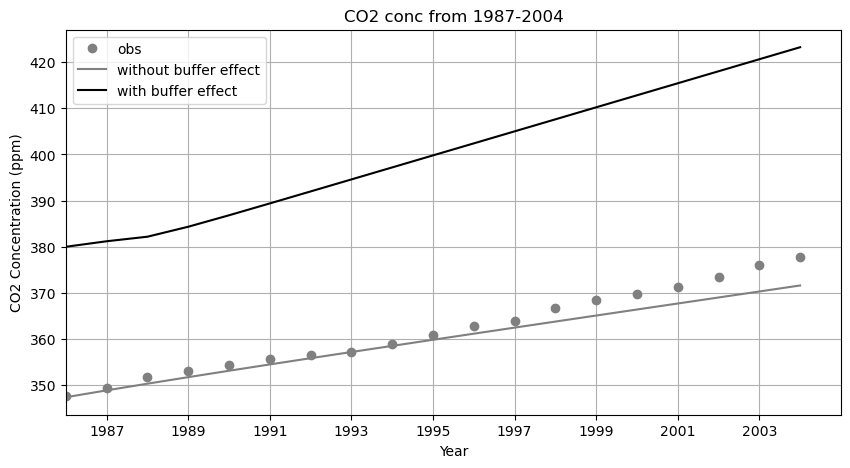

In [11]:
plt.figure(figsize=(10, 5))

# Mauna Loa CO2 annual mean data as observation data
plt.plot(obs_df['year'], obs_df['mean'], 'o', c='grey', label='obs')
# CO2 conc. from ODE 1.1 solution 
plt.plot(obs_df['year'], N1_solution_Q1, '-', c='grey', label='without buffer effect')
# CO2 conc. from ODE 1.1 solution 
plt.plot(obs_df['year'], N1_solution_Q2, '-', c='k', label='with buffer effect')

plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('CO2 conc from 1987-2004')

plt.xlim(1986, 2005)
plt.xticks(np.arange(1987, 2005, 2))

plt.grid()
plt.legend()
plt.show()

# Fig. 1 in reference:

![fig2.png](https://d3i71xaburhd42.cloudfront.net/ea7861b80bafb26284dcc0663f2d328c68b42f3d/3-Figure2-1.png)

## 修改了以下代码
## #Year range: 1987-2014  
## →  #Year range: 1986-2014
##
## t = np.arange(1, 19, 1) 
## → t = np.arange(1, 20, 1)
##
## obs_df = pd.read_csv('co2_annmean_mlo.csv',skiprows=43).iloc[28:46]  
## →     obs_df = pd.read_csv('co2_annmean_mlo.csv',skiprows=43).iloc[27:46]
##
## 结果更贴近原图